In [1]:
# Two-Way ANOVA for Medicine and Gender on Blood Pressure Reduction

# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Set random seed for reproducibility
np.random.seed(42)

# Sample size (number of participants per group)
n = 10

# Creating simulated dataset
data = {
    "Medicine": (["A"] * n + ["B"] * n + ["C"] * n) * 2,  # Three medicines
    "Gender": ["Male"] * (3 * n) + ["Female"] * (3 * n),  # Two genders
    "BP_Reduction": (
        np.random.normal(5, 2, n).tolist() +   # Medicine A - Male
        np.random.normal(10, 2, n).tolist() +  # Medicine B - Male
        np.random.normal(15, 2, n).tolist() +  # Medicine C - Male
        np.random.normal(6, 2, n).tolist() +   # Medicine A - Female
        np.random.normal(12, 2, n).tolist() +  # Medicine B - Female
        np.random.normal(17, 2, n).tolist()    # Medicine C - Female
    )
}



In [3]:

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Display first 5 rows of dataset
df.head()

,Medicine,Gender,BP_Reduction
0,A,Male,5.993428
1,A,Male,4.723471
2,A,Male,6.295377
3,A,Male,8.046060
4,A,Male,4.531693


In [7]:
# Performing Two-Way ANOVA using statsmodels
model = smf.ols('BP_Reduction ~ C(Medicine) + C(Gender) + C(Medicine):C(Gender)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA table
print(anova_table)


                            sum_sq    df           F        PR(>F)
C(Medicine)            1078.744096   2.0  184.882705  6.954131e-25
C(Gender)                48.634324   1.0   16.670581  1.479934e-04
C(Medicine):C(Gender)    40.398504   2.0    6.923778  2.104786e-03
Residual                157.538211  54.0         NaN           NaN


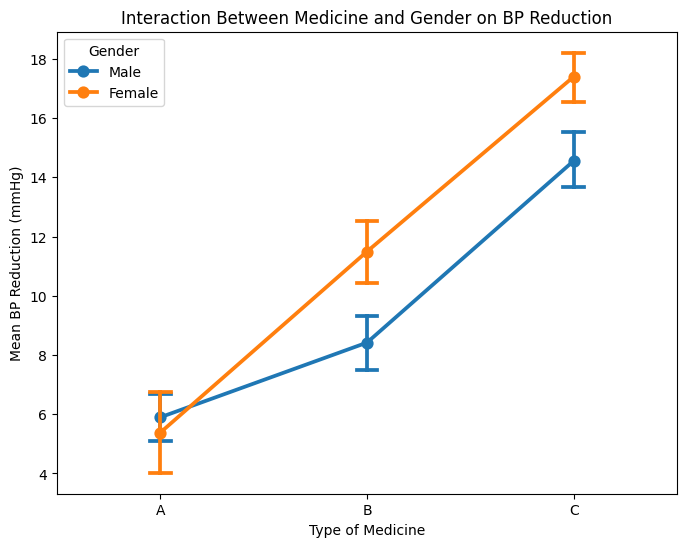

In [8]:
# Visualization using seaborn
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x="Medicine", y="BP_Reduction", hue="Gender", capsize=0.1)
plt.title("Interaction Between Medicine and Gender on BP Reduction")
plt.ylabel("Mean BP Reduction (mmHg)")
plt.xlabel("Type of Medicine")
plt.show()
